# **Data Preprocessing**

In [3]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [4]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [5]:
# importing dataset
data = pd.read_csv('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/KDDTrain+.txt',header=None, names=col_names)
#data = pd.read_csv('datasets/KDDTrain+.txt',header=None, names=col_names)

In [6]:
# print dataset
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [7]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [8]:
# descriptive statistics of dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# number of attack labels 
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [10]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [11]:
# calling change_label() function
change_label(data)

In [12]:
# distribution of attack classes
data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

# **Data Normalization**

In [13]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [14]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [15]:
# data before normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [16]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [17]:
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


# **One-hot-encoding**

In [18]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [19]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [20]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Binary Classification**

In [21]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [22]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [23]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [24]:
#np.save("labels/le1_classes.npy",le1.classes_,allow_pickle=True)

In [25]:
# dataset with binary labels and label encoded column
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,abnormal,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1


In [26]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal


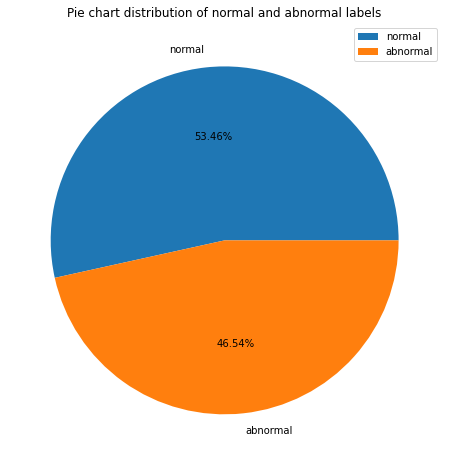

In [27]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
#plt.savefig('plots/Pie_chart_binary.png')
plt.show()

# **Multi-class Classification**

In [28]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [29]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,Probe,R2L,U2R,normal)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [30]:
#np.save("labels/le2_classes.npy",le2.classes_,allow_pickle=True)

In [31]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.224532,-0.376387,4,0,0,0,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.602433,-0.387635,-0.345084,4,0,0,0,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.355014,-0.376387,4,0,0,0,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos


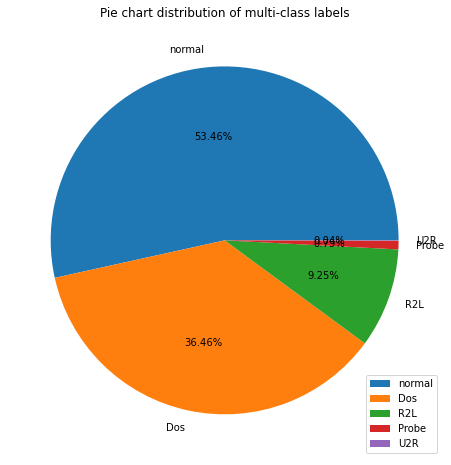

In [32]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
#plt.savefig('plots/Pie_chart_multi.png')
plt.show()

# **Feature Extraction**

In [33]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

C:\Users\Arastu sharma\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [35]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [36]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [37]:
# saving final dataset to disk
bin_data.to_csv("C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/bin_data.csv")
# final dataset for binary classification
bin_data

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,abnormal
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,abnormal
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,abnormal


In [38]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

C:\Users\Arastu sharma\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
intrusion                   1.000000
Name: intrusion, dtype: float64

In [40]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [41]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [42]:
# saving final dataset to disk
multi_data.to_csv('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/multi_data.csv')

# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,Dos
3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,Dos


# **Linear Support Vector Machine Classifier (Binary Classification)**

In [43]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [44]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [45]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [46]:
pkl_filename = "C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk") 

In [47]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  96.69778370483266


In [48]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [49]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03302216295167333
Mean Squared Error -  0.03302216295167333
Root Mean Squared Error -  0.1817200125238641
R2 Score -  86.74560396265441
Accuracy -  96.69778370483266


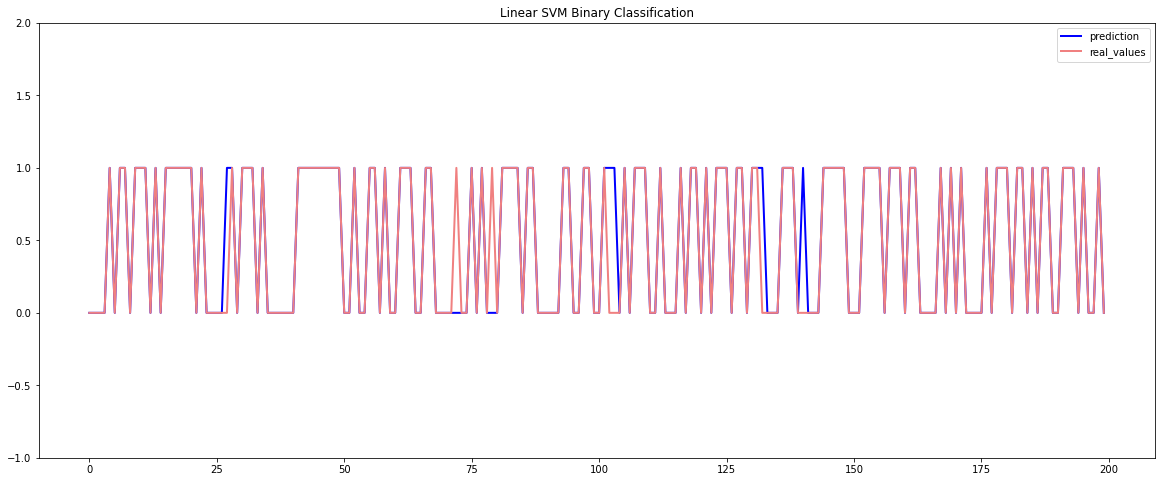

In [50]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear SVM Binary Classification")
#plt.savefig('plots/lsvm_real_pred_bin.png')
plt.show()

# **Quadratic Support Vector Machine Classifier (Binary Classification)**

In [51]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [52]:
pkl_filename = "C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/qsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [53]:
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  95.71029402425859


In [57]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.92      0.95     14720
      normal       0.93      0.99      0.96     16774

    accuracy                           0.96     31494
   macro avg       0.96      0.95      0.96     31494
weighted avg       0.96      0.96      0.96     31494



In [58]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.04289705975741411
Mean Squared Error -  0.04289705975741411
Root Mean Squared Error -  0.20711605383797296
R2 Score -  83.24290009836652
Accuracy -  95.71029402425859


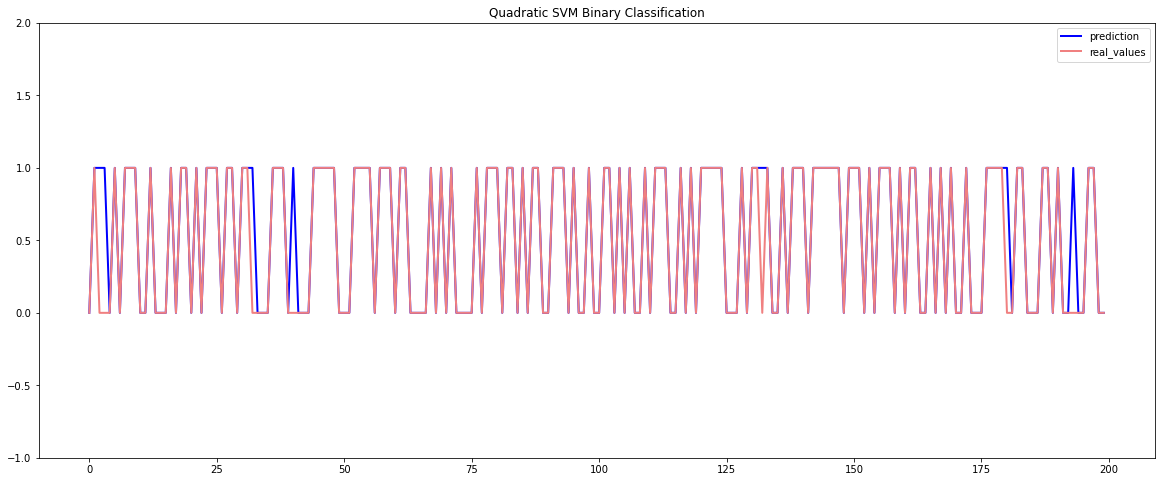

In [59]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic SVM Binary Classification")
#plt.savefig('plots/qsvm_real_pred_bin.png')
plt.show()

# **K-nearest-neighbor Classifier (Binary Classification)**

In [60]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [62]:
pkl_filename = "C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

In [63]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  98.55210516288817


In [64]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.98      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



In [65]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.014478948371118308
Mean Squared Error -  0.014478948371118308
Root Mean Squared Error -  0.1203285019067316
R2 Score -  94.18391428763977
Accuracy -  98.55210516288817


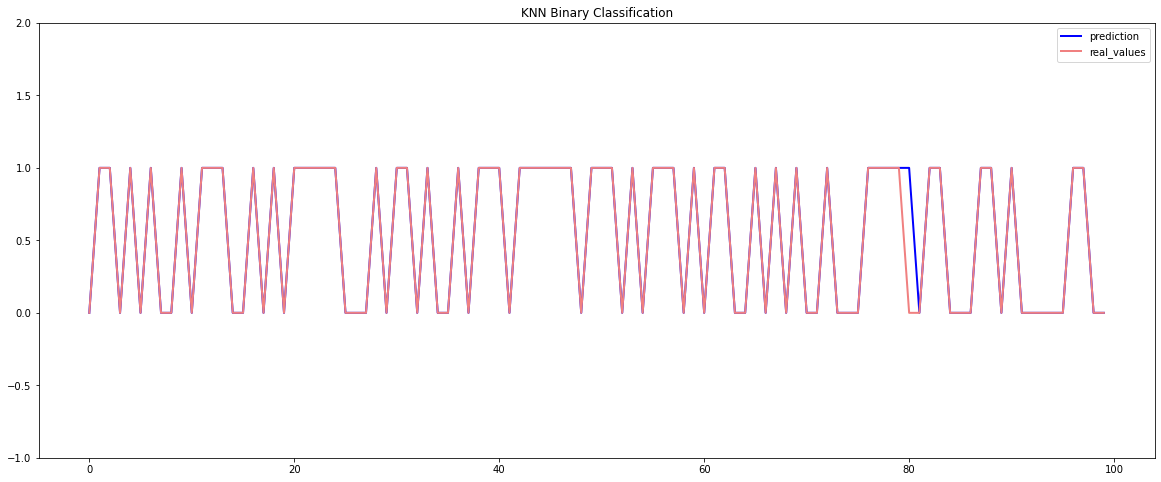

In [66]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("KNN Binary Classification")
#plt.savefig('plots/knn_real_pred_bin.png')
plt.show()

# **Linear Discriminant Analysis Classifier (Binary Classification)**

In [67]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

LinearDiscriminantAnalysis()

In [68]:
pkl_filename = "C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/lda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")

In [69]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.70730932876104


In [70]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [71]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03292690671238966
Mean Squared Error -  0.03292690671238966
Root Mean Squared Error -  0.1814577270671868
R2 Score -  86.8001441639753
Accuracy -  96.70730932876104


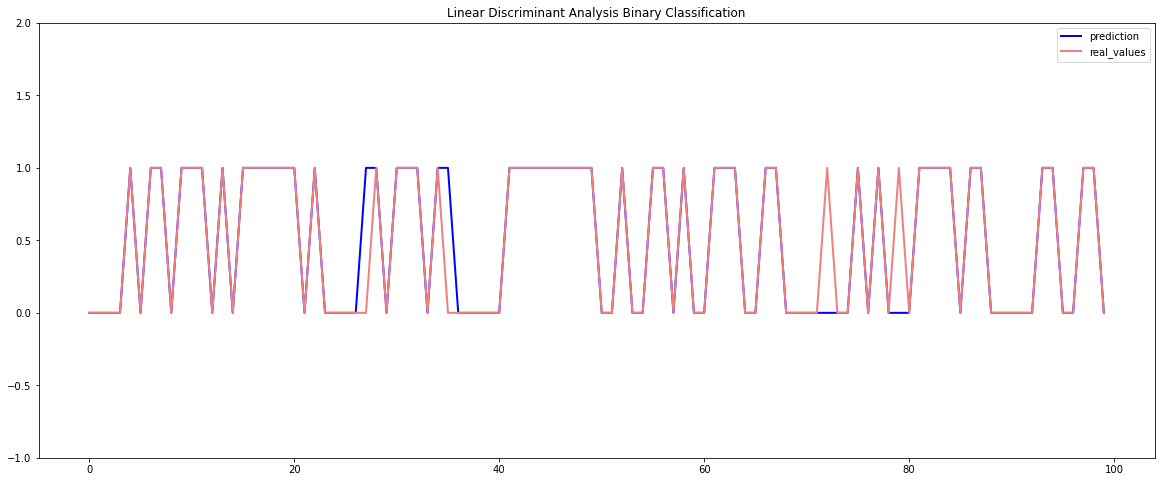

In [72]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear Discriminant Analysis Binary Classification")
#plt.savefig('plots/lda_real_pred_bin.png')
plt.show()

# **Quadratic Discriminant Analysis Classifier (Binary Classification)**

In [73]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

C:\Users\Arastu sharma\.conda\envs\tensorflow_env\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [74]:
pkl_filename = "C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/qda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [75]:
y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", ac)

QDA-Classifier Set-Accuracy is  68.84168413031053


In [76]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       1.00      0.33      0.50     14720
      normal       0.63      1.00      0.77     16774

    accuracy                           0.69     31494
   macro avg       0.81      0.67      0.64     31494
weighted avg       0.80      0.69      0.65     31494



In [77]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.3115831586968946
Mean Squared Error -  0.3115831586968946
Root Mean Squared Error -  0.5581963442167054
R2 Score -  13.69091326315054
Accuracy -  68.84168413031053


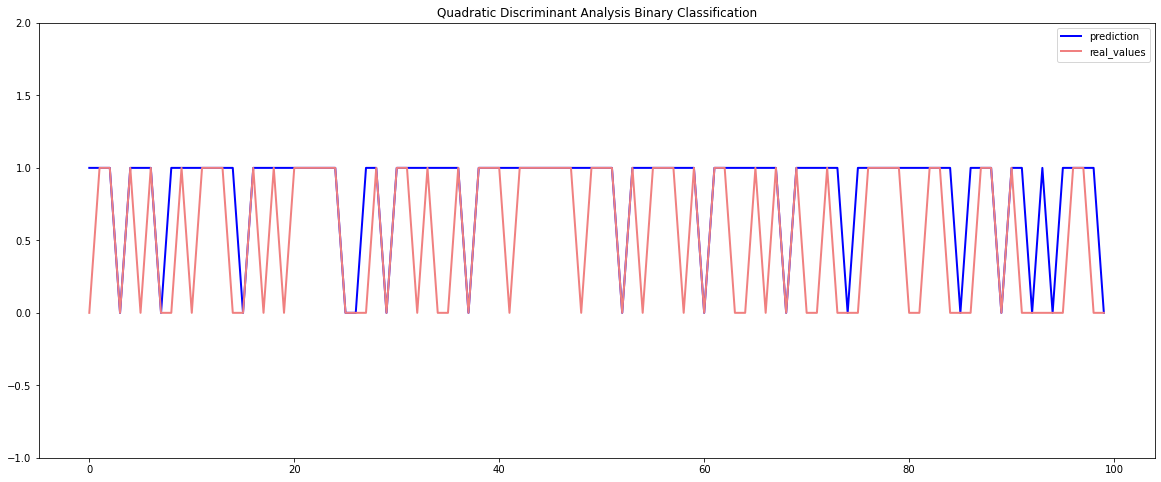

In [78]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic Discriminant Analysis Binary Classification")
#plt.savefig('plots/qda_real_pred_bin.png')
plt.show()

# **Multi Layer Perceptron Classifier (Binary Classification)**

In [79]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [80]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [81]:
mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))#In hidden layer we are using ReLU
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))#At output layer sigmoid function is used

In [82]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
# summary of model layers
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 4,751
Trainable params: 4,751
Non-trainable params: 0
_________________________________________________________________


In [84]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=50, batch_size=5000,validation_split=0.2)

Train on 75583 samples, validate on 18896 samples
Epoch 1/50
75583/75583 [==============================] - 0s 5us/step - loss: 0.5288 - accuracy: 0.8660 - val_loss: 0.4198 - val_accuracy: 0.8972
Epoch 2/50
75583/75583 [==============================] - 0s 3us/step - loss: 0.3674 - accuracy: 0.8959 - val_loss: 0.3099 - val_accuracy: 0.9027
Epoch 3/50
75583/75583 [==============================] - 0s 3us/step - loss: 0.2829 - accuracy: 0.9011 - val_loss: 0.2510 - val_accuracy: 0.9060
Epoch 4/50
75583/75583 [==============================] - 0s 3us/step - loss: 0.2354 - accuracy: 0.9043 - val_loss: 0.2152 - val_accuracy: 0.9118
Epoch 5/50
75583/75583 [==============================] - 0s 3us/step - loss: 0.2041 - accuracy: 0.9197 - val_loss: 0.1901 - val_accuracy: 0.9285
Epoch 6/50
75583/75583 [==============================] - 0s 3us/step - loss: 0.1814 - accuracy: 0.9392 - val_loss: 0.1711 - val_accuracy: 0.9525
Epoch 7/50
75583/75583 [==============================] - 0s 3us/step - lo

In [85]:
filepath = 'C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/mlp_binary.json'
weightspath = 'C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/mlp_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [86]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)                                 #ACCURACY OF MLP
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

31494/31494 [==============================] - 0s 12us/step
Test results - Loss: 0.07145341407803255 - Accuracy: 97.54238724708557


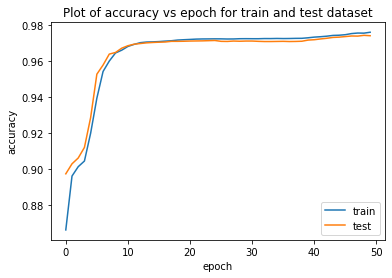

In [88]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig('plots/mlp_binary_accuracy.png')
plt.show()

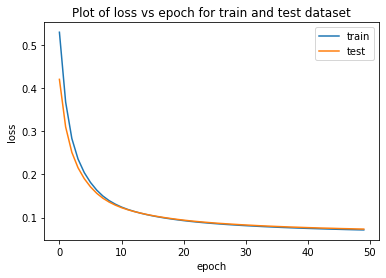

In [89]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig('plots/mlp_binary_loss.png')
plt.show()

In [90]:
y_pred = mlp.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

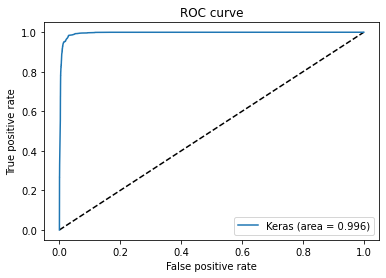

In [92]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/mlp_binary_roc.png')
plt.show()

In [93]:
pred = mlp.predict(X_test)
y_classes = (mlp.predict(X_test)>0.5).astype('int32')

In [94]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9857517586741386
F1 Score -  0.9771303628412717
Precision Score -  0.9686584651435266


# **Long Short-Term Memory Classifier (Binary Classification)**

In [95]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']] # target attribute

In [96]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [97]:
X_train = X_train.values

In [98]:
y_train = np.array(y_train)

In [99]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [100]:
x_train.shape

(94479, 1, 93)

In [101]:
lst = Sequential()
# input layer and LSTM layer with 50 neurons
lst.add(LSTM(50,input_dim=93))

# outpute layer with sigmoid activation
lst.add(Dense(1,activation='sigmoid'))

C:\Users\Arastu sharma\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arastu sharma\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(None, 93))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [103]:
# summary of model layers
lst.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                28800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 28,851
Trainable params: 28,851
Non-trainable params: 0
_________________________________________________________________


In [104]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Train on 75583 samples, validate on 18896 samples
Epoch 1/100
75583/75583 [==============================] - 1s 19us/step - loss: 0.6226 - accuracy: 0.8148 - val_loss: 0.5391 - val_accuracy: 0.8801
Epoch 2/100
75583/75583 [==============================] - 1s 13us/step - loss: 0.4843 - accuracy: 0.8856 - val_loss: 0.4201 - val_accuracy: 0.8936
Epoch 3/100
75583/75583 [==============================] - 1s 11us/step - loss: 0.3807 - accuracy: 0.8935 - val_loss: 0.3351 - val_accuracy: 0.8994
Epoch 4/100
75583/75583 [==============================] - 1s 12us/step - loss: 0.3085 - accuracy: 0.9069 - val_loss: 0.2778 - val_accuracy: 0.9149
Epoch 5/100
75583/75583 [==============================] - 1s 12us/step - loss: 0.2598 - accuracy: 0.9131 - val_loss: 0.2388 - val_accuracy: 0.9181
Epoch 6/100
75583/75583 [==============================] - 1s 11us/step - loss: 0.2257 - accuracy: 0.9175 - val_loss: 0.2109 - val_accuracy: 0.9301
Epoch 7/100
75583/75583 [==============================] - 1s 

In [105]:
X_test = X_test.to_numpy()

In [106]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [107]:
filepath = 'C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/lst_binary.json'
weightspath = 'C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [108]:
# load json and create model
json_file = open(filepath, 'r')
loaded_model_json = json_file.read()
json_file.close()
lst = model_from_json(loaded_model_json)

# load weights into new model
lst.load_weights(weightspath)
print("Loaded model from disk")

Loaded model from disk


In [109]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [110]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

31494/31494 [==============================] - 1s 17us/step
Test results - Loss: 0.06459427236384128 - Accuracy: 97.7932333946228%


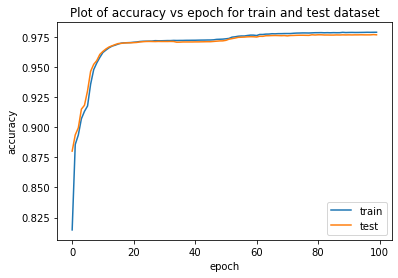

In [112]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

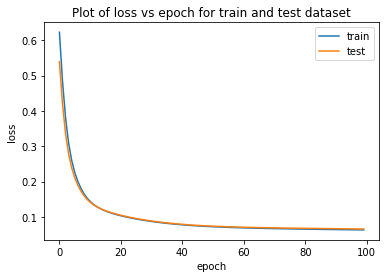

In [113]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig('plots/lstm_binary_loss.png')
plt.show()

In [115]:
y_test.shape

(31494, 1)

In [116]:
y_pred = lst.predict(x_test)

In [117]:
y_pred.shape

(31494, 1)

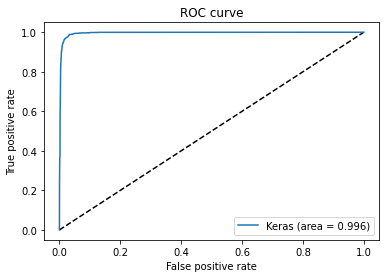

In [119]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.savefig('plots/lstm_binary_roc.png')
plt.show()

In [120]:
y_classes = (lst.predict(x_test)>0.5).astype('int32')

In [121]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9865267676165494
F1 Score -  0.9794323932408039
Precision Score -  0.9724393253805018


# **Auto Encoder Classifier (Binary Classification)**

In [122]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [123]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [124]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [125]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [126]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [127]:
# summary of model layers
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 93)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_5 (Dense)              (None, 93)                4743      
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [128]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Train on 94479 samples, validate on 31494 samples
Epoch 1/100
94479/94479 [==============================] - 1s 14us/step - loss: 0.1149 - accuracy: 0.4129 - val_loss: 0.1073 - val_accuracy: 0.2861
Epoch 2/100
94479/94479 [==============================] - 1s 12us/step - loss: 0.1055 - accuracy: 0.6101 - val_loss: 0.1053 - val_accuracy: 0.6937
Epoch 3/100
94479/94479 [==============================] - 1s 12us/step - loss: 0.1049 - accuracy: 0.6840 - val_loss: 0.1051 - val_accuracy: 0.6992
Epoch 4/100
94479/94479 [==============================] - 1s 11us/step - loss: 0.1048 - accuracy: 0.7222 - val_loss: 0.1050 - val_accuracy: 0.7524
Epoch 5/100
94479/94479 [==============================] - 1s 11us/step - loss: 0.1048 - accuracy: 0.7553 - val_loss: 0.1050 - val_accuracy: 0.7875
Epoch 6/100
94479/94479 [==============================] - 1s 13us/step - loss: 0.1047 - accuracy: 0.7901 - val_loss: 0.1049 - val_accuracy: 0.7958
Epoch 7/100
94479/94479 [==============================] - 1s 

Epoch 56/100
94479/94479 [==============================] - 1s 11us/step - loss: 0.1043 - accuracy: 0.9195 - val_loss: 0.1046 - val_accuracy: 0.9407
Epoch 57/100
94479/94479 [==============================] - 1s 10us/step - loss: 0.1043 - accuracy: 0.9206 - val_loss: 0.1046 - val_accuracy: 0.9392
Epoch 58/100
94479/94479 [==============================] - 1s 12us/step - loss: 0.1043 - accuracy: 0.9208 - val_loss: 0.1046 - val_accuracy: 0.9254
Epoch 59/100
94479/94479 [==============================] - 1s 12us/step - loss: 0.1043 - accuracy: 0.9203 - val_loss: 0.1046 - val_accuracy: 0.9471
Epoch 60/100
94479/94479 [==============================] - 1s 10us/step - loss: 0.1043 - accuracy: 0.9215 - val_loss: 0.1046 - val_accuracy: 0.9324
Epoch 61/100
94479/94479 [==============================] - 1s 10us/step - loss: 0.1043 - accuracy: 0.9218 - val_loss: 0.1046 - val_accuracy: 0.9111
Epoch 62/100
94479/94479 [==============================] - 1s 10us/step - loss: 0.1043 - accuracy: 0.9210

In [130]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [131]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

31494/31494 [==============================] - 1s 19us/step
Test results - Loss: 0.10456812223903927 - Accuracy: 0.9010605216026306%


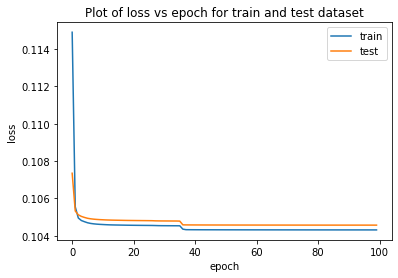

In [132]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/ae_binary_loss.png')
plt.show()

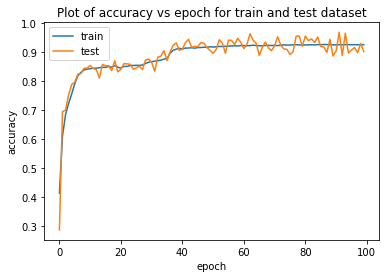

In [135]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig(C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/ae_binary_accuracy.png')
plt.show()

In [137]:
# calculating reconstruction error 
predictions = autoencoder.predict(X_test)

In [138]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [139]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104568,0.532609
std,0.043573,0.498943
min,0.040628,0.000000
25%,0.074501,0.000000
50%,0.083821,1.000000
75%,0.151404,1.000000
max,0.229791,1.000000


In [140]:
predictions.shape

(31494, 93)

## **AE Classifier**

In [141]:
i_dim = predictions.shape[1]

#input layer
i_layer = Input(shape=(i_dim, ))
#hidden layer with 50 neurons
fvector = Dense(50, activation="sigmoid")(i_layer)                    
#doutput layer
o_layer = Dense(1, activation='sigmoid')(fvector)

In [142]:
# creating model with input, encoding, decoding, output layers
ae_classifier = Model(inputs=i_layer, outputs=o_layer)

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [143]:
# summary of model layers
ae_classifier.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 93)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 4,751
Trainable params: 4,751
Non-trainable params: 0
_________________________________________________________________


In [144]:
# training the model on training dataset
his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Train on 25195 samples, validate on 6299 samples
Epoch 1/300
25195/25195 [==============================] - 0s 9us/step - loss: 0.6710 - accuracy: 0.6510 - val_loss: 0.6464 - val_accuracy: 0.5333
Epoch 2/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.6275 - accuracy: 0.7856 - val_loss: 0.6054 - val_accuracy: 0.8565
Epoch 3/300
25195/25195 [==============================] - 0s 7us/step - loss: 0.5831 - accuracy: 0.8618 - val_loss: 0.5569 - val_accuracy: 0.8851
Epoch 4/300
25195/25195 [==============================] - 0s 7us/step - loss: 0.5308 - accuracy: 0.8897 - val_loss: 0.5003 - val_accuracy: 0.8844
Epoch 5/300
25195/25195 [==============================] - 0s 6us/step - loss: 0.4726 - accuracy: 0.8987 - val_loss: 0.4415 - val_accuracy: 0.9006
Epoch 6/300
25195/25195 [==============================] - 0s 6us/step - loss: 0.4162 - accuracy: 0.8996 - val_loss: 0.3882 - val_accuracy: 0.9011
Epoch 7/300
25195/25195 [==============================] - 0s 6us/ste

25195/25195 [==============================] - 0s 8us/step - loss: 0.1998 - accuracy: 0.9214 - val_loss: 0.1952 - val_accuracy: 0.9249
Epoch 57/300
25195/25195 [==============================] - 0s 7us/step - loss: 0.1996 - accuracy: 0.9228 - val_loss: 0.1952 - val_accuracy: 0.9213
Epoch 58/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1994 - accuracy: 0.9218 - val_loss: 0.1948 - val_accuracy: 0.9216
Epoch 59/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1993 - accuracy: 0.9219 - val_loss: 0.1945 - val_accuracy: 0.9279
Epoch 60/300
25195/25195 [==============================] - 0s 6us/step - loss: 0.1991 - accuracy: 0.9230 - val_loss: 0.1943 - val_accuracy: 0.9247
Epoch 61/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1989 - accuracy: 0.9229 - val_loss: 0.1944 - val_accuracy: 0.9216
Epoch 62/300
25195/25195 [==============================] - 0s 6us/step - loss: 0.1987 - accuracy: 0.9239 - val_loss: 0.1943 

25195/25195 [==============================] - 0s 5us/step - loss: 0.1951 - accuracy: 0.9290 - val_loss: 0.1889 - val_accuracy: 0.9319
Epoch 112/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1950 - accuracy: 0.9288 - val_loss: 0.1888 - val_accuracy: 0.9319
Epoch 113/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1949 - accuracy: 0.9292 - val_loss: 0.1892 - val_accuracy: 0.9314
Epoch 114/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1950 - accuracy: 0.9290 - val_loss: 0.1889 - val_accuracy: 0.9321
Epoch 115/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1949 - accuracy: 0.9291 - val_loss: 0.1888 - val_accuracy: 0.9321
Epoch 116/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1949 - accuracy: 0.9292 - val_loss: 0.1889 - val_accuracy: 0.9317
Epoch 117/300
25195/25195 [==============================] - 0s 6us/step - loss: 0.1949 - accuracy: 0.9290 - val_loss: 0

25195/25195 [==============================] - 0s 5us/step - loss: 0.1941 - accuracy: 0.9293 - val_loss: 0.1877 - val_accuracy: 0.9335
Epoch 167/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1942 - accuracy: 0.9299 - val_loss: 0.1885 - val_accuracy: 0.9309
Epoch 168/300
25195/25195 [==============================] - 0s 6us/step - loss: 0.1941 - accuracy: 0.9298 - val_loss: 0.1877 - val_accuracy: 0.9328
Epoch 169/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1941 - accuracy: 0.9293 - val_loss: 0.1879 - val_accuracy: 0.9324
Epoch 170/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1940 - accuracy: 0.9297 - val_loss: 0.1878 - val_accuracy: 0.9325
Epoch 171/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1942 - accuracy: 0.9301 - val_loss: 0.1878 - val_accuracy: 0.9328
Epoch 172/300
25195/25195 [==============================] - 0s 6us/step - loss: 0.1941 - accuracy: 0.9290 - val_loss: 0

Epoch 221/300
25195/25195 [==============================] - 0s 4us/step - loss: 0.1908 - accuracy: 0.9299 - val_loss: 0.1844 - val_accuracy: 0.9341
Epoch 222/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1909 - accuracy: 0.9308 - val_loss: 0.1844 - val_accuracy: 0.9332
Epoch 223/300
25195/25195 [==============================] - 0s 6us/step - loss: 0.1908 - accuracy: 0.9303 - val_loss: 0.1840 - val_accuracy: 0.9336
Epoch 224/300
25195/25195 [==============================] - 0s 7us/step - loss: 0.1905 - accuracy: 0.9303 - val_loss: 0.1847 - val_accuracy: 0.9313
Epoch 225/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1906 - accuracy: 0.9299 - val_loss: 0.1844 - val_accuracy: 0.9324
Epoch 226/300
25195/25195 [==============================] - 0s 6us/step - loss: 0.1905 - accuracy: 0.9303 - val_loss: 0.1841 - val_accuracy: 0.9328
Epoch 227/300
25195/25195 [==============================] - 0s 6us/step - loss: 0.1903 - accuracy: 0.9305

Epoch 276/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1845 - accuracy: 0.9320 - val_loss: 0.1776 - val_accuracy: 0.9343
Epoch 277/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1845 - accuracy: 0.9321 - val_loss: 0.1772 - val_accuracy: 0.9346
Epoch 278/300
25195/25195 [==============================] - 0s 4us/step - loss: 0.1843 - accuracy: 0.9319 - val_loss: 0.1770 - val_accuracy: 0.9346
Epoch 279/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1842 - accuracy: 0.9323 - val_loss: 0.1768 - val_accuracy: 0.9346
Epoch 280/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1841 - accuracy: 0.9322 - val_loss: 0.1767 - val_accuracy: 0.9348
Epoch 281/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1839 - accuracy: 0.9320 - val_loss: 0.1762 - val_accuracy: 0.9351
Epoch 282/300
25195/25195 [==============================] - 0s 5us/step - loss: 0.1837 - accuracy: 0.9325

In [147]:
filepath = 'C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/ae_classifier_binary.json'
weightspath = 'C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/ae_classifier_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  ae_classifier_json = ae_classifier.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(ae_classifier_json)

  # serialize weights to HDF5
  ae_classifier.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  ae_classifier = model_from_json(loaded_model_json)

  # load weights into new model
  ae_classifier.load_weights(weightspath)
  print("Loaded model from disk")

In [148]:
ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [149]:
# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

31494/31494 [==============================] - 1s 21us/step
Test results - Loss: 0.48518637876224047 - Accuracy: 87.7659261226654%


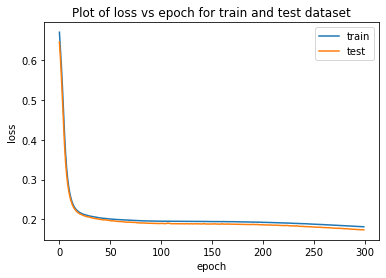

In [152]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/ae_classifier_binary_loss.png')
plt.show()

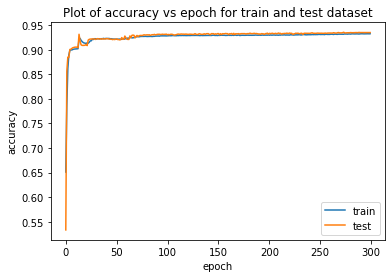

In [153]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/ae_classifier_binary_accuracy.png')
plt.show()

In [154]:
y_pred = ae_classifier.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#auc = auc(fpr, tpr)

No handles with labels found to put in legend.


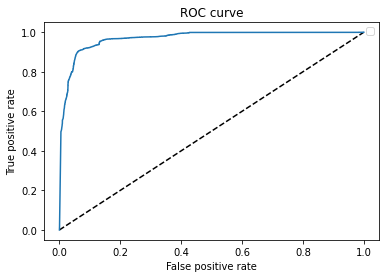

In [155]:
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/ae_binary_roc.png')
plt.show()

In [156]:
pred = ae_classifier.predict(X_test)
y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

In [157]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9713246691307976
F1 Score -  0.8942616427454101
Precision Score -  0.8285278413424867


# **Linear Support Vector Machine Classifier (Multi-class Classification)**

In [158]:
X = multi_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = multi_data['intrusion'] # target attribute

In [159]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [160]:
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [161]:
# saving trained model to disk
pkl_filename = "C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loade model from disk")
  

Saved model to disk
Loade model from disk


In [162]:
y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

LSVM-Classifier Multi-class Set-Accuracy is  95.24671365974471


In [151]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.95      0.96      0.96     11484
       Probe       0.86      0.79      0.82      2947
         R2L       0.61      0.60      0.61       274
         U2R       0.00      0.00      0.00        15
      normal       0.97      0.98      0.98     16774

    accuracy                           0.95     31494
   macro avg       0.68      0.67      0.67     31494
weighted avg       0.95      0.95      0.95     31494



c:\users\pramo\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\pramo\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\pramo\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.10132088651806694
Mean Squared Error -  0.28332380770940496
Root Mean Squared Error -  0.5322816995815326
R2 Score -  92.18330960765653
Accuracy -  95.24671365974471


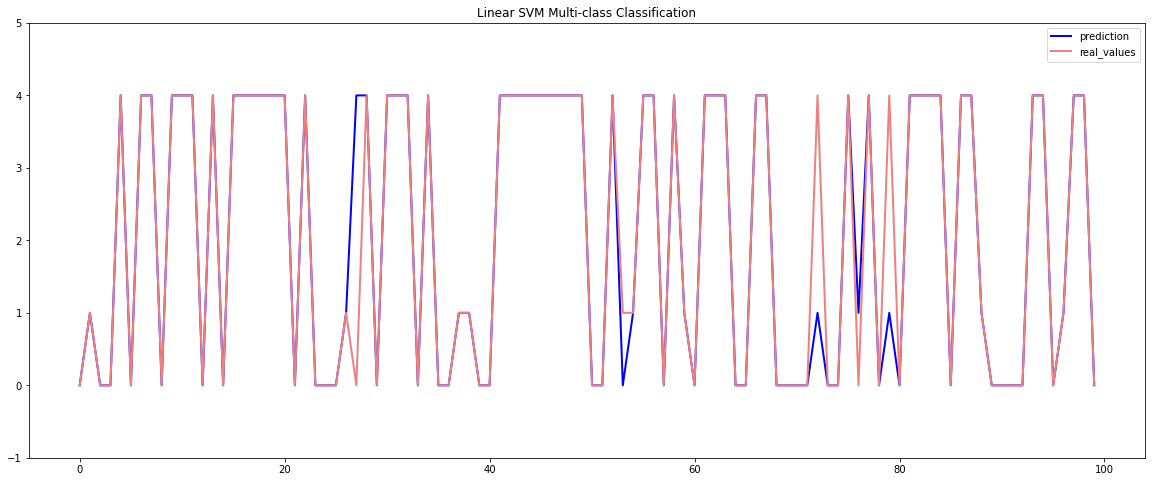

In [164]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Linear SVM Multi-class Classification")
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/lsvm_real_pred_multi.png')
plt.show()

# **Quadratic Support Vector Machine Classifier (Multi-class Classification)**

In [165]:
qsvm=SVC(kernel='poly',gamma='auto')
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [166]:
pkl_filename = "C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/qsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [167]:
y_pred=qsvm.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QSVM-Classifier Multi-class Set-Accuracy is ", ac)

QSVM-Classifier Multi-class Set-Accuracy is  92.86213246967677


In [168]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.96      0.94      0.95     11484
       Probe       0.96      0.61      0.74      2947
         R2L       0.00      0.00      0.00       274
         U2R       0.00      0.00      0.00        15
      normal       0.91      1.00      0.95     16774

    accuracy                           0.93     31494
   macro avg       0.56      0.51      0.53     31494
weighted avg       0.92      0.93      0.92     31494



C:\Users\Arastu sharma\.conda\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.1998158379373849
Mean Squared Error -  0.6449164920302279
Root Mean Squared Error -  0.8030669287364709
R2 Score -  82.88055324849559
Accuracy -  92.86213246967677


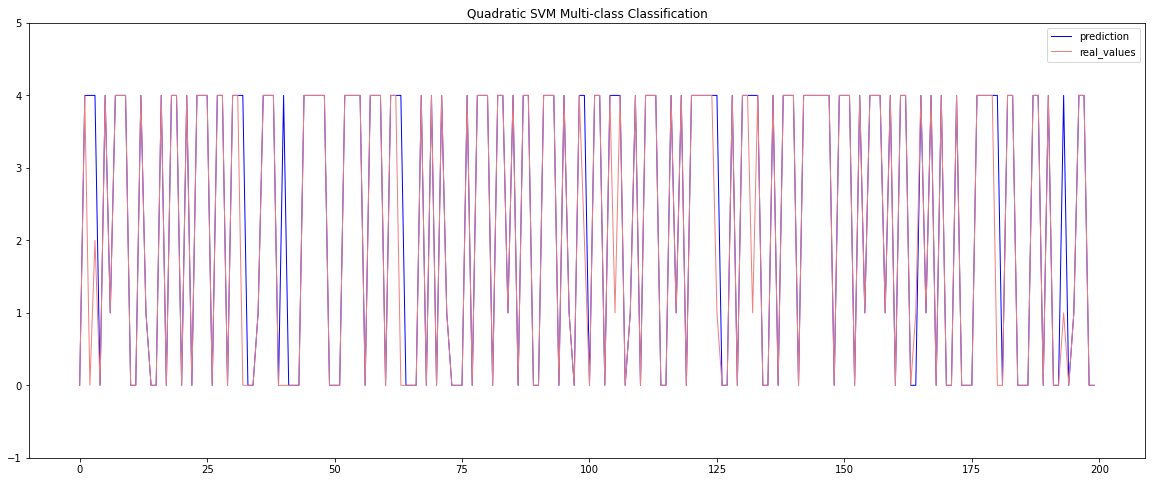

In [170]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=1.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=1.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Quadratic SVM Multi-class Classification")
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/qsvm_real_pred_multi.png')
plt.show()

# **K-nearest-neighbor Classifier (Multi-class Classification)**

In [171]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [172]:
pkl_filename = "C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/knn_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [173]:
y_pred=knn.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Multi-class Set-Accuracy is ", ac)

KNN-Classifier Multi-class Set-Accuracy is  98.29173810884613


In [174]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.96      0.97      0.96      2947
         R2L       0.92      0.87      0.89       274
         U2R       0.40      0.13      0.20        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.85      0.79      0.81     31494
weighted avg       0.98      0.98      0.98     31494



In [175]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.05086683177748143
Mean Squared Error -  0.17285832222010541
Root Mean Squared Error -  0.41576233862641454
R2 Score -  95.23039034401897
Accuracy -  98.29173810884613


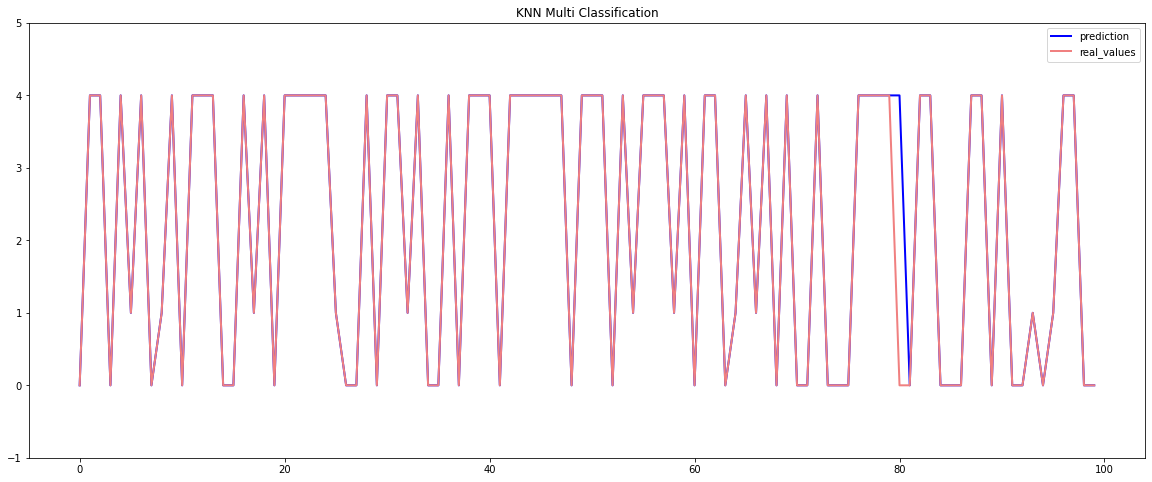

In [165]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("KNN Multi Classification")
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/knn_real_pred_multi.png')
plt.show()

# **Linear Discriminant Analysis Classifier (Multi-class Classification)**

In [176]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # training model on training dataset

LinearDiscriminantAnalysis()

In [177]:
pkl_filename = "C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/lda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")
  

Saved model to disk
Loaded model from disk


In [178]:
y_pred = lda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  93.1923540991935


In [179]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.94      0.96      0.95     11484
       Probe       0.88      0.73      0.80      2947
         R2L       0.37      0.89      0.52       274
         U2R       0.03      0.47      0.06        15
      normal       0.97      0.95      0.96     16774

    accuracy                           0.93     31494
   macro avg       0.64      0.80      0.66     31494
weighted avg       0.94      0.93      0.94     31494



In [180]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.14380516923858513
Mean Squared Error -  0.3957261700641392
Root Mean Squared Error -  0.6290676991104687
R2 Score -  89.08369120793829
Accuracy -  93.1923540991935


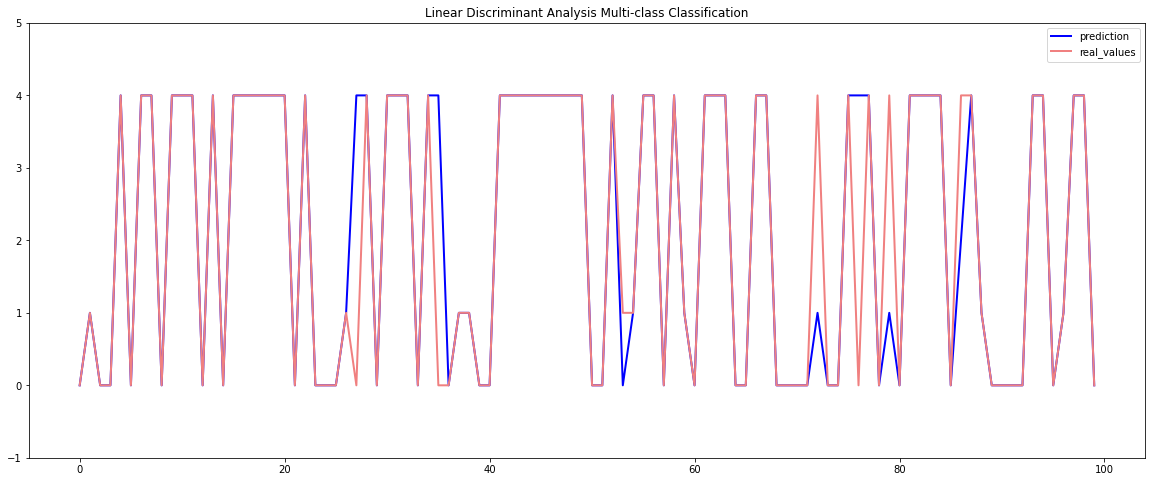

In [181]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Linear Discriminant Analysis Multi-class Classification")
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/lda_real_pred_multi.png')
plt.show()

# **Quadratic Discriminant Analysis Classifier (Multi-class Classification)**

In [182]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

C:\Users\Arastu sharma\.conda\envs\tensorflow_env\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [183]:
pkl_filename = "C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/qda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [184]:
y_pred = qda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Multi-class Set-Accuracy is ", ac)

QDA-Classifier Multi-class Set-Accuracy is  43.21140534705023


In [185]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.41      0.58     11484
       Probe       0.97      0.06      0.12      2947
         R2L       0.03      1.00      0.06       274
         U2R       0.00      0.00      0.00        15
      normal       0.48      0.50      0.49     16774

    accuracy                           0.43     31494
   macro avg       0.49      0.39      0.25     31494
weighted avg       0.71      0.43      0.49     31494



C:\Users\Arastu sharma\.conda\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  1.6243411443449547
Mean Squared Error -  5.141963548612434
Root Mean Squared Error -  2.2675898104843464
R2 Score -  -33.36070761701204
Accuracy -  43.21140534705023


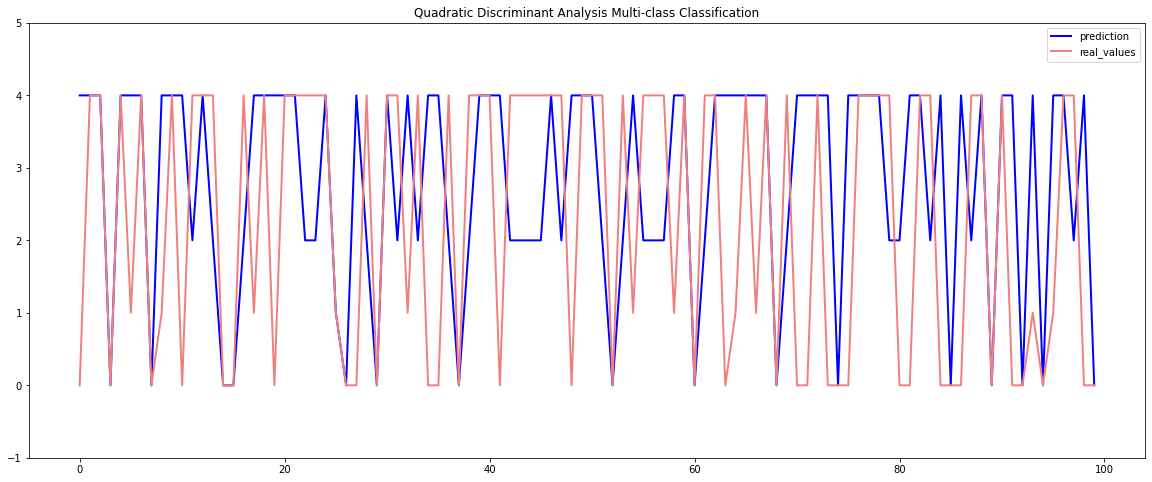

In [188]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Quadratic Discriminant Analysis Multi-class Classification")
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/qda_real_pred_multi.png')
plt.show()

# **Multi Layer Perceptron Classifier (Multi-class Classification)**

In [189]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [190]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [191]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

In [192]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [193]:
# summary of model layers
mlp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 255       
Total params: 4,955
Trainable params: 4,955
Non-trainable params: 0
_________________________________________________________________


In [194]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Train on 75583 samples, validate on 18896 samples
Epoch 1/100
75583/75583 [==============================] - 0s 7us/step - loss: 1.5849 - accuracy: 0.2510 - val_loss: 1.2113 - val_accuracy: 0.6594
Epoch 2/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.9854 - accuracy: 0.8076 - val_loss: 0.7623 - val_accuracy: 0.8550
Epoch 3/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.6398 - accuracy: 0.8869 - val_loss: 0.5270 - val_accuracy: 0.9140
Epoch 4/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.4660 - accuracy: 0.9129 - val_loss: 0.4137 - val_accuracy: 0.9168
Epoch 5/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.3812 - accuracy: 0.9184 - val_loss: 0.3551 - val_accuracy: 0.9250
Epoch 6/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.3340 - accuracy: 0.9242 - val_loss: 0.3188 - val_accuracy: 0.9271
Epoch 7/100
75583/75583 [==============================] - 0s 6us/st

75583/75583 [==============================] - 0s 4us/step - loss: 0.1031 - accuracy: 0.9659 - val_loss: 0.1048 - val_accuracy: 0.9654
Epoch 57/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.1025 - accuracy: 0.9663 - val_loss: 0.1042 - val_accuracy: 0.9658
Epoch 58/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.1019 - accuracy: 0.9665 - val_loss: 0.1037 - val_accuracy: 0.9658
Epoch 59/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.1013 - accuracy: 0.9667 - val_loss: 0.1030 - val_accuracy: 0.9660
Epoch 60/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.1009 - accuracy: 0.9666 - val_loss: 0.1027 - val_accuracy: 0.9663
Epoch 61/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.1002 - accuracy: 0.9670 - val_loss: 0.1020 - val_accuracy: 0.9662
Epoch 62/100
75583/75583 [==============================] - 0s 4us/step - loss: 0.0997 - accuracy: 0.9672 - val_loss: 0.1015 

In [196]:
filepath = 'C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/mlp_multi.json'
weightspath = 'C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/mlp_multi.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")
  
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [197]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [198]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

31494/31494 [==============================] - 1s 23us/step
Test results - Loss: 0.0901538396602001 - Accuracy: 96.94227576255798%


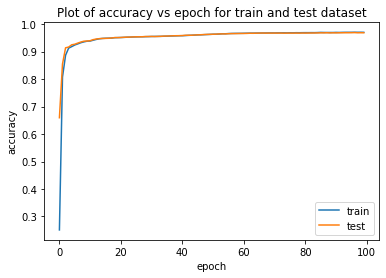

In [199]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/mlp_multi_accuracy.png')
plt.show()

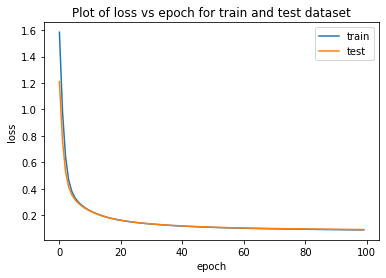

In [200]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('C:/Users/Arastu sharma/Desktop/Datasets/NSL KDD Dataset/nsl-kdd/mlp_multi_loss.png')
plt.show()

In [201]:
n_classes = len(le2.classes_)
n_classes

5

In [202]:
y_pred = mlp.predict(X_test)

In [205]:
pred = mlp.predict(X_test)

In [206]:
for j in range(0,pred.shape[1]):
  for i in range(0,pred.shape[0]):
    pred[i][j] = int(round(pred[i][j]))

In [207]:
pred_df = pd.DataFrame(pred,columns=y_test.columns)

In [208]:
print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))

Recall Score -  0.9672636057661776
F1 Score -  0.9693257390142235
Precision Score -  0.9713966836734694
